In [3]:
import numpy as np
from datasets import load_dataset, concatenate_datasets
from Modelling.Baseline.create_baseline_dataset import add_tokenized
from pathlib import Path
f = str(Path("../../final_dataset/dataset.py"))
dataset = map(lambda x: add_tokenized( "moses", ["words"], 4, load_dataset(str(Path("../../final_dataset/dataset.py")), split=x), batch_size=2000),   ["train", "validation", "test"])
dataset = concatenate_datasets(list(dataset))

for i,server in enumerate(dataset.features["server"].names + ['all']):
    if server == "all":
        server_rows = dataset
    else:
        server_rows = dataset.filter(lambda batch: list(map(lambda x: x == i, batch["server"])), batched=True,num_proc=4)
    if len(server_rows) == 0:
        continue


    uniq_authors = np.unique(np.concatenate(list(map(np.array, server_rows["authors"]))))
    uniq_category = set(server_rows["category"])
    time_range = min(server_rows["date"]), max(server_rows["date"])
    avg_words = np.mean(server_rows["words"])

    print(f"Server {server} has {len(server_rows)} rows, {len(uniq_authors)} authors, {len(uniq_category) - 1} categories, and time range {time_range} and avg words {avg_words}")




Found cached dataset dataset (/home/kydliceh/.cache/huggingface/datasets/dataset/default/0.0.0/dd40f907db796b1c96c399ea8c9ec6f99ebe75363e9a0f0f63f6a15c6f03423f)
Loading cached processed dataset at /home/kydliceh/.cache/huggingface/datasets/dataset/default/0.0.0/dd40f907db796b1c96c399ea8c9ec6f99ebe75363e9a0f0f63f6a15c6f03423f/cache-004177b97eafd937_*_of_00004.arrow
Loading cached processed dataset at /home/kydliceh/.cache/huggingface/datasets/dataset/default/0.0.0/dd40f907db796b1c96c399ea8c9ec6f99ebe75363e9a0f0f63f6a15c6f03423f/cache-23354c45ea8bbeb1_*_of_00004.arrow
Found cached dataset dataset (/home/kydliceh/.cache/huggingface/datasets/dataset/default/0.0.0/dd40f907db796b1c96c399ea8c9ec6f99ebe75363e9a0f0f63f6a15c6f03423f)
Loading cached processed dataset at /home/kydliceh/.cache/huggingface/datasets/dataset/default/0.0.0/dd40f907db796b1c96c399ea8c9ec6f99ebe75363e9a0f0f63f6a15c6f03423f/cache-8f433d48169dd42a_*_of_00004.arrow
Loading cached processed dataset at /home/kydliceh/.cache/hu

Server seznamzpravy has 65472 rows, 382 authors, 11 categories, and time range (datetime.date(2016, 9, 14), datetime.date(2022, 8, 6)) and avg words 463.0216122922776


Filter (num_proc=4):   0%|          | 0/1627410 [00:00<?, ? examples/s]

Server idnes has 295840 rows, 4386 authors, 21 categories, and time range (datetime.date(2000, 1, 3), datetime.date(2022, 8, 9)) and avg words 442.35492833964304


Filter (num_proc=4):   0%|          | 0/1627410 [00:00<?, ? examples/s]

Server aktualne has 112960 rows, 633 authors, 19 categories, and time range (datetime.date(2005, 10, 26), datetime.date(2022, 8, 6)) and avg words 488.95486898017


Filter (num_proc=4):   0%|          | 0/1627410 [00:00<?, ? examples/s]

Server novinky has 321417 rows, 2518 authors, 17 categories, and time range (datetime.date(2002, 12, 20), datetime.date(2022, 8, 6)) and avg words 285.8204637589175


Filter (num_proc=4):   0%|          | 0/1627410 [00:00<?, ? examples/s]

Server denik has 664133 rows, 2497 authors, 18 categories, and time range (datetime.date(2007, 3, 27), datetime.date(2022, 8, 6)) and avg words 347.900257930264


Filter (num_proc=4):   0%|          | 0/1627410 [00:00<?, ? examples/s]

Server irozhlas has 167588 rows, 1900 authors, 8 categories, and time range (datetime.date(2000, 7, 8), datetime.date(2022, 6, 25)) and avg words 300.23891328734754
Server all has 1627410 rows, 10930 authors, 25 categories, and time range (datetime.date(2000, 1, 3), datetime.date(2022, 8, 9)) and avg words 362.32394541019164


In [43]:
from datasets import load_dataset, concatenate_datasets
task = "server"
columns_to_keep = ["server", "category", "authors_cum_gender", "day_of_week"]
dst = load_dataset("hynky/czech_news_dataset")
dst = dst.remove_columns(set(dst['train'].column_names) - set(columns_to_keep))

Found cached dataset parquet (/home/kydliceh/.cache/huggingface/datasets/hynky___parquet/hynky--czech_news_dataset-0cbab0cb100c6b2f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

In [124]:
import pandas as pd
dfs = {}
for column in columns_to_keep:
    filtered = dst.filter(lambda batch: [i != 0 for i in batch[column]], batched=True, num_proc=4)
    train_df = filtered["train"].to_pandas()
    val_df = filtered["validation"].to_pandas()
    test_df = filtered["test"].to_pandas()
    df = pd.DataFrame(
        {
            "train": train_df[column].value_counts(),
            "validation": val_df[column].value_counts(),
            "test": test_df[column].value_counts(),
        },
    ).T
    df.columns = [x.capitalize() for x in filtered["train"].features[column].names[1:]]
    df.index = [x.capitalize() for x in df.index]
    df = df.T
    if column in ["server", "category"]:
        df = df.reindex(df["Train"].sort_values(ascending=False).index)

    dfs[column] = df



Loading cached processed dataset at /home/kydliceh/.cache/huggingface/datasets/hynky___parquet/hynky--czech_news_dataset-0cbab0cb100c6b2f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-a2e957478a039e18_*_of_00004.arrow
Loading cached processed dataset at /home/kydliceh/.cache/huggingface/datasets/hynky___parquet/hynky--czech_news_dataset-0cbab0cb100c6b2f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-3f050d0139d47721_*_of_00004.arrow
Loading cached processed dataset at /home/kydliceh/.cache/huggingface/datasets/hynky___parquet/hynky--czech_news_dataset-0cbab0cb100c6b2f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-d8e3507f8bfab267_*_of_00004.arrow
Loading cached processed dataset at /home/kydliceh/.cache/huggingface/datasets/hynky___parquet/hynky--czech_news_dataset-0cbab0cb100c6b2f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-8514e6ea80dac6ad_*_of_00004.arrow
Load

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

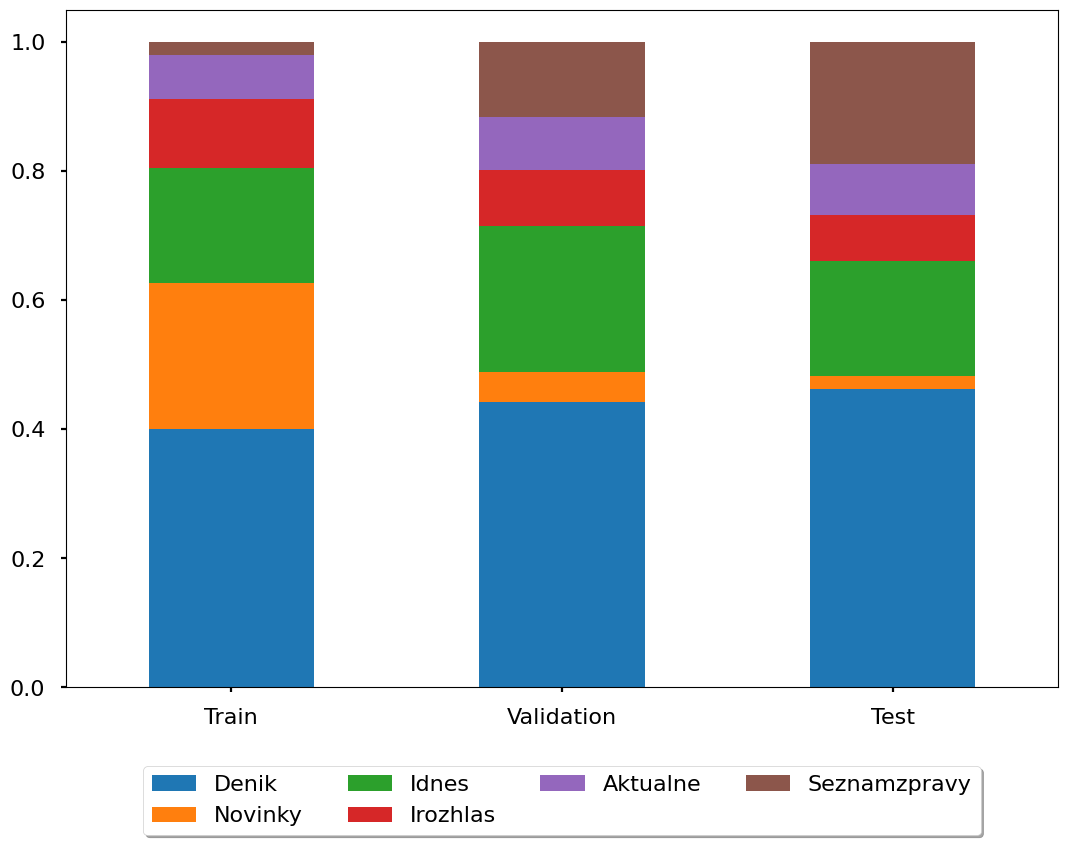

In [141]:
for column in dfs.keys():
    with plt.style.context("seaborn-poster"):
        df = dfs[column].T
        df = df.div(df.sum(axis=1), axis=0)
        ax = df.plot.bar(rot=0, stacked=True)
        # Put legend under the plot
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
        # save the plot
        plt.savefig(f"tasks_im/{column}.png", bbox_inches='tight')

In [143]:
for column in dfs.keys():
    df = dfs[column].T
    if len(df.columns) > 10:
        # It's already sorted
        other = df.iloc[:, 10:].sum(axis=1)
        df = df.iloc[:, :10]
        df.insert(10, "Other", other)
        # Cast to int
        df = df.astype(int)



    # print as latex tabl
    # add total
    df["Total"] = df.sum(axis=1)
    print(df.T.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    Train &  Validation &    Test \\
\midrule
Denik        &   553799 &       53980 &   56354 \\
Novinky      &   313274 &        5647 &    2496 \\
Idnes        &   246441 &       27673 &   21726 \\
Irozhlas     &   148388 &       10530 &    8670 \\
Aktualne     &    93281 &       10037 &    9642 \\
Seznamzpravy &    28115 &       14189 &   23168 \\
Total        &  1383298 &      122056 &  122056 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &     Train &  Validation &     Test \\
\midrule
Domácí         &  216889.0 &     26326.0 &  31195.0 \\
Sport          &  154743.0 &     18565.0 &  18134.0 \\
Zahraniční     &  147426.0 &      8344.0 &   9705.0 \\
Kultura        &   78330.0 &      2838.0 &   3084.0 \\
Ekonomika      &   70506.0 &      3847.0 &   2761.0 \\
Krimi          &   53711.0 &       644.0 &   1236.0 \\
Technologie    &   29337.0 &      1952.0 &   1763.0 \\
Koktejl        &   23900.0 &       295.0 &    161.0 \\
Životní styl

/COMP.TMP/kydliceh_4383/ipykernel_1717512/329514032.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.T.to_latex())
/COMP.TMP/kydliceh_4383/ipykernel_1717512/329514032.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.T.to_latex())
/COMP.TMP/kydliceh_4383/ipykernel_1717512/329514032.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The argume

In [123]:
other = df_category.iloc[:, 10:].sum(axis=1)
df_category = df_category.iloc[:, :10]
df_category.insert(10, "Other", other)
# convert to int
df_category = df_category.astype(int)
# add cumsum
df_category["Cumsum"] = df_category.sum(axis=1)
# print as latex table
print(df_category.T.to_latex())
 


\begin{tabular}{lrrr}
\toprule
{} &   Train &  Validation &   Test \\
\midrule
Zahraniční &  147426 &        8344 &   9705 \\
Domácí     &  216889 &       26326 &  31195 \\
Sport      &  154743 &       18565 &  18134 \\
Kultura    &   78330 &        2838 &   3084 \\
Revue      &    4619 &         659 &    568 \\
Koktejl    &   23900 &         295 &    161 \\
Ekonomika  &   70506 &        3847 &   2761 \\
Krimi      &   53711 &         644 &   1236 \\
Podnikání  &    8496 &        1303 &    500 \\
Auto       &   14924 &        1356 &   1198 \\
Other      &  105475 &       13907 &  13810 \\
Cumsum     &  879019 &       78084 &  82352 \\
\bottomrule
\end{tabular}



/COMP.TMP/kydliceh_4383/ipykernel_1717512/2193873136.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_category.T.to_latex())
